In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

# 마코위츠 데이터 로드

In [4]:
df1=pd.read_excel('./datasets/마코위츠/투자_2012.xlsx', index_col=0)

In [5]:
df1

,003160,004960,024910,039740,085370,134060
날짜,,,,,,
2012-04-02,1820.0,8500,5740,3200.0,5070.0,3955.0
2012-04-03,2090.0,8490,5700,3370.0,5190.0,3980.0
2012-04-04,2185.0,8250,5640,3330.0,5120.0,3925.0
2012-04-05,2175.0,8380,5660,3320.0,5040.0,3775.0
2012-04-06,1915.0,8370,5600,3340.0,5060.0,3785.0
...,...,...,...,...,...,...
2013-03-25,NaN,8920,5610,NaN,NaN,NaN
2013-03-26,NaN,8750,5680,NaN,NaN,NaN
2013-03-27,NaN,8820,5670,NaN,NaN,NaN


## pct change

In [6]:
daily_ret = df1.pct_change()

In [7]:
daily_ret

,003160,004960,024910,039740,085370,134060
날짜,,,,,,
2012-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-03,0.148352,-0.001176,-0.006969,0.053125,0.023669,0.006321
2012-04-04,0.045455,-0.028269,-0.010526,-0.011869,-0.013487,-0.013819
2012-04-05,-0.004577,0.015758,0.003546,-0.003003,-0.015625,-0.038217
2012-04-06,-0.119540,-0.001193,-0.010601,0.006024,0.003968,0.002649
...,...,...,...,...,...,...
2013-03-25,0.000000,0.000000,-0.015789,0.000000,0.000000,0.000000
2013-03-26,0.000000,-0.019058,0.012478,0.000000,0.000000,0.000000
2013-03-27,0.000000,0.008000,-0.001761,0.000000,0.000000,0.000000


## annuar_ret

In [8]:
annual_ret = daily_ret.mean()*252
annual_ret

003160    0.056149
004960    0.101988
024910    0.001770
039740    0.194940
085370    0.029786
134060   -0.001951
dtype: float64

In [9]:
daily_cov = daily_ret.cov()
daily_cov

,003160,004960,024910,039740,085370,134060
003160,0.000363,-1.091344e-05,0.000025,1.662348e-04,0.000043,-6.542600e-06
004960,-0.000011,4.265913e-04,-0.000023,9.115006e-07,0.000006,-2.676968e-06
024910,0.000025,-2.333927e-05,0.000366,5.666575e-06,0.000019,4.885593e-06
039740,0.000166,9.115006e-07,0.000006,1.504007e-04,0.000026,6.823493e-08
085370,0.000043,6.471177e-06,0.000019,2.628220e-05,0.000031,2.597485e-06
134060,-0.000007,-2.676968e-06,0.000005,6.823493e-08,0.000003,1.544776e-05


In [10]:
annual_cov = daily_cov * 252
annual_cov

,003160,004960,024910,039740,085370,134060
003160,0.091360,-0.002750,0.006232,0.041891,0.010753,-0.001649
004960,-0.002750,0.107501,-0.005881,0.000230,0.001631,-0.000675
024910,0.006232,-0.005881,0.092153,0.001428,0.004899,0.001231
039740,0.041891,0.000230,0.001428,0.037901,0.006623,0.000017
085370,0.010753,0.001631,0.004899,0.006623,0.007885,0.000655
134060,-0.001649,-0.000675,0.001231,0.000017,0.000655,0.003893


In [11]:
list=annual_cov.columns.tolist()

In [12]:
stocks = list

In [13]:
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = [] 

## 몬테까를로 시뮬레이션 20000개 시나리오 

In [14]:
#몬테까를로 시뮬레이션 20000개 시나리오 
for _ in range(20000): 
    weights = np.random.random(len(stocks))  # 랜덤숫자 4개
    weights /= np.sum(weights)  # 4개의 랜덤 숫자를 랜덤 숫자의 총합으로 나눠서, 4 종목 비중의 합이 1

    returns = np.dot(weights, annual_ret) # 비중 * 연간 수익율 --> 포트 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # 종목별 연간 공분산과 종목별 비중 배열 곱하고, 이를 다시 종목 별 비중 전치로 곱함. 이걸 제곱근. 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) 

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]  

In [15]:
df

,Returns,Risk,Sharpe,003160,004960,024910,039740,085370,134060
0,0.060681,0.117840,0.514945,0.093787,0.234290,0.230654,0.157655,0.029372,0.254243
1,0.089601,0.145433,0.616101,0.155432,0.296616,0.194883,0.243874,0.092947,0.016248
2,0.075316,0.144427,0.521481,0.299938,0.022584,0.061047,0.244635,0.286711,0.085084
3,0.060424,0.131294,0.460222,0.256746,0.185365,0.194425,0.131523,0.049553,0.182388
4,0.022733,0.117487,0.193496,0.035991,0.090502,0.350412,0.042078,0.113360,0.367657
...,...,...,...,...,...,...,...,...,...
19995,0.077817,0.170964,0.455169,0.345307,0.021282,0.237735,0.273471,0.087141,0.035064
19996,0.063063,0.119726,0.526726,0.142796,0.046035,0.234632,0.229144,0.187260,0.160134
19997,0.066840,0.090538,0.738255,0.084209,0.110928,0.073055,0.223539,0.254730,0.253538
19998,0.057431,0.100522,0.571326,0.128893,0.122915,0.167372,0.176831,0.115892,0.288097


In [16]:
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()] 

In [17]:
max_sharpe

,Returns,Risk,Sharpe,003160,004960,024910,039740,085370,134060
4473,0.115563,0.114533,1.008995,0.000695,0.142685,0.049828,0.504869,0.096211,0.205712


In [18]:
min_risk

,Returns,Risk,Sharpe,003160,004960,024910,039740,085370,134060
7874,0.031305,0.059505,0.526085,0.011476,0.012144,0.006675,0.091122,0.420981,0.457602


## 몬테까를로 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.


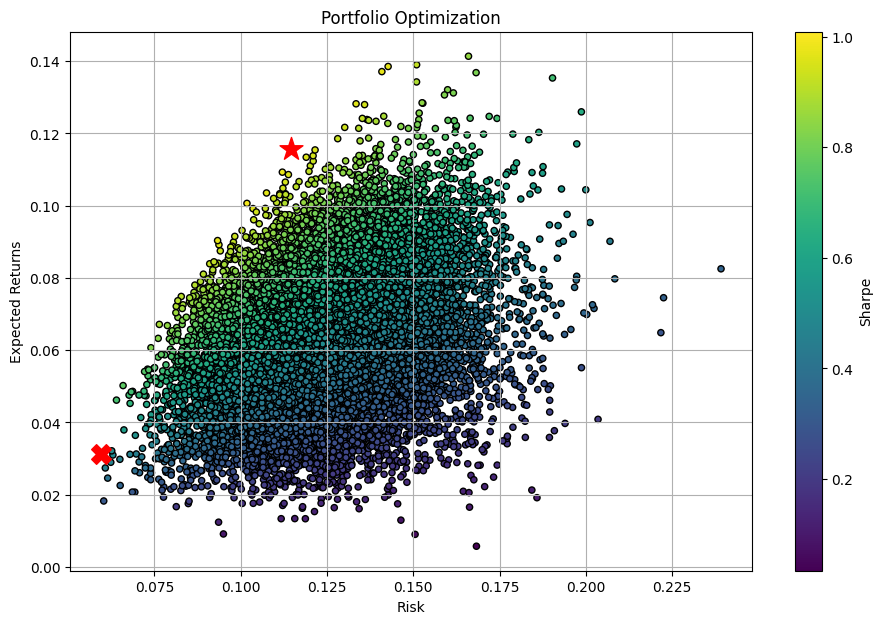

In [19]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)  
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300) 
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)  
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

## 1. 볼린저밴드와 MFI를 활용한 추세 추종 매매

추세 추종 : 상승 추세에 매수, 하락 추세에 매도
현금흐름지표 MFI나 일중강도 같은 거래량 관련 지표를 함께 활용

매수 : 주가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (%b가 0.8보다 크고, MFI가 80보다 클 때)
매도 : 주가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도 (%b가 0.2보다 작고, MFI가 20보다 작을 때)

%b : 주가가 볼린저 밴드 어디에 위치하는지 
     (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)

MFI : 중심가격 TP (고가, 저가, 종가 합을 3으로 나눔) 
     TP * 거래량 = 현금흐름  --> 이것을 중심가격이 전일 대비 상승한 날은 '긍정적 현금흐름 합'
                                                   하락한 날은 '부정적 현금흐름 합'



## 2. 볼린저 밴드와 일중 강도를 활용한 반전 매매

# a.볼린저밴드

주가가 반점하는 지점을 찾아서 매수 또는 매도
매수 : 주가가 하단 밴드 부근에서 W(쌍바닥) 패턴을 나타내고, 강세 지표가 확증 할 때 매수 (%b가 0.05보다 작고, II% 가 0보다 크면 매수)
매도 : 주가가 상단 밴드 부근에서 주가 태그, 약세 지표가 확증 할 때 매수 (%b가 0.95보다 크고, II% 가 0보다 작으면 매수)

---
# Preprocessing 

In [20]:
import pandas as pd
import numpy as np
import time
from pykrx import stock

In [3]:
df=pd.read_excel('./datasets/df_2012.xlsx', index_col=0)
df["거래소코드"] = df["거래소코드"].map(padding)
df

,회계년도,거래소코드
239,2012,023430
240,2012,023430
241,2012,023430
242,2012,023430
243,2012,023430
...,...,...
5496,2012,001780
5497,2012,001780
5498,2012,001780
5499,2012,001780


In [4]:
a=df['거래소코드'].unique()
a

array(['023430', '023410', '078350', '080000', '024890', '025860',
       '052300', '039740', '065450', '031310', '036030', '009470',
       '004870', '004960', '006050', '001780'], dtype=object)

In [5]:
a=pd.DataFrame(a)
a=a.rename(columns={0:'거래소코드'})
df=a
df

,거래소코드
0,023430
1,023410
2,078350
3,080000
4,024890
5,025860
6,052300
7,039740
8,065450
9,031310


In [6]:
n=20
sigma = 2
b=[]
for i in df.index:
    a = stock.get_market_ohlcv("20120102", "20130430", df.loc[i,"거래소코드"])
    a["center"] = a['종가'].rolling(n).mean()
    a["ub"] = a['center'] + sigma*a['종가'].rolling(n).std()
    a["lb"] = a['center'] - sigma*a['종가'].rolling(n).std()
    b.append(a)

In [7]:
b

[             시가   고가   저가   종가     거래량      거래대금   등락률  center          ub  \
 날짜                                                                           
 2012-01-02  511  529  506  513  138646  70950871 -3.21     NaN         NaN   
 2012-01-03  549  549  503  537   77360  39854151  4.68     NaN         NaN   
 2012-01-04  509  540  509  540   49932  26022983  0.56     NaN         NaN   
 2012-01-05  569  569  514  514   88720  46462630 -4.81     NaN         NaN   
 2012-01-06  514  535  500  522   92141  47122221  1.56     NaN         NaN   
 ...         ...  ...  ...  ...     ...       ...   ...     ...         ...   
 2013-04-24  647  650  620  630   16396  10241690  0.32  641.10  672.380732   
 2013-04-25  630  648  621  631   15182   9597477  0.16  639.40  668.853978   
 2013-04-26  642  642  620  635   11910   7414301  0.63  638.05  665.552919   
 2013-04-29  625  644  625  633    4014   2558556 -0.31  636.50  661.196047   
 2013-04-30  640  640  626  635   38165  24143712  0

In [8]:
# 각 인덱스에 회사명이랑 거래소코드 넣어주기
for i in df.index:
    b[i]["거래소코드"]=df.loc[i,"거래소코드"]

In [9]:
bol = pd.concat(b)
bol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5296 entries, 2012-01-02 to 2013-04-30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      5296 non-null   int32  
 1   고가      5296 non-null   int32  
 2   저가      5296 non-null   int32  
 3   종가      5296 non-null   int32  
 4   거래량     5296 non-null   int32  
 5   거래대금    5296 non-null   int64  
 6   등락률     5296 non-null   float32
 7   center  4992 non-null   float64
 8   ub      4992 non-null   float64
 9   lb      4992 non-null   float64
 10  거래소코드   5296 non-null   object 
dtypes: float32(1), float64(3), int32(5), int64(1), object(1)
memory usage: 372.4+ KB


In [10]:
bol['PB'] = (bol['종가'] - bol['lb']) / (bol['ub'] - bol['lb'])

In [11]:
bol.head(20)

,시가,고가,저가,종가,거래량,거래대금,등락률,center,ub,lb,거래소코드,PB
날짜,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN
2012-01-09,522,535,511,520,69318,36616570,-0.38,NaN,NaN,NaN,023430,NaN
2012-01-10,535,535,509,516,43649,22438853,-0.77,NaN,NaN,NaN,023430,NaN
2012-01-11,516,520,500,515,40150,20329599,-0.19,NaN,NaN,NaN,023430,NaN
2012-01-12,515,545,506,515,30772,15728904,0.00,NaN,NaN,NaN,023430,NaN


# b. MFI (Money Flow Index)

In [205]:
# mfi=pd.read_excel('./datasets/볼린저밴드/투자_2012.xlsx', index_col=0)
# mfi["거래소코드"] = mfi["거래소코드"].map(padding)
# mfi=mfi.set_index('날짜')
# mfi

,거래소코드,시가,고가,저가,종가,거래량
날짜,,,,,,
2012-04-02,039740,3105,3240,3030,3200,23569
2012-04-03,039740,3200,3470,3170,3370,126842
2012-04-04,039740,3360,3360,3200,3330,18543
2012-04-05,039740,3250,3440,3200,3320,19868
2012-04-06,039740,3320,3350,3230,3340,9099
...,...,...,...,...,...,...
2013-03-25,004960,8920,8960,8760,8920,10523
2013-03-26,004960,9000,9000,8700,8750,13310
2013-03-27,004960,8820,8820,8650,8820,16240


In [12]:
mfi=bol.copy()
mfi

,시가,고가,저가,종가,거래량,거래대금,등락률,center,ub,lb,거래소코드,PB
날짜,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470


In [13]:
mfi.rename(columns={'고가':'high'},inplace = True)
mfi.rename(columns={'저가':'low'},inplace = True)
mfi.rename(columns={'종가':'close'},inplace = True)
mfi.rename(columns={'거래량':'volume'},inplace = True)


In [14]:
mfi['TP'] = (mfi['high'] + mfi['low'] + mfi['close']) / 3

In [15]:
mfi["PMF"] = 0
mfi["NMF"] = 0

In [16]:
for i in range(len(mfi.close)-1):
    if mfi.TP.values[i] < mfi.TP.values[i+1]:
        mfi.PMF.values[i+1] = mfi.TP.values[i+1] * mfi.volume.values[i+1]
        mfi.NMF.values[i+1] = 0
    else:
        mfi.NMF.values[i+1] = mfi.TP.values[i+1] * mfi.volume.values[i+1]
        mfi.PMF.values[i+1] = 0

In [17]:
mfi['거래소코드'].unique()

array(['023430', '023410', '078350', '080000', '024890', '025860',
       '052300', '039740', '065450', '031310', '036030', '009470',
       '004870', '004960', '006050', '001780'], dtype=object)

In [18]:
mfi

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF
날짜,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN,516.000000,0,0
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN,529.666667,40975013,0
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN,529.666667,0,26447315
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN,532.333333,47228613,0
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN,519.000000,0,47821179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655,2593.333333,362324973,0
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882,2583.333333,0,442530166
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470,2558.333333,0,252195383


In [19]:
mfi['MFR'] = (mfi.PMF.rolling(window=10).sum() / mfi.NMF.rolling(window=10).sum())

In [20]:
mfi['MFI10'] = 100 - 100 / (1 + mfi['MFR'])

In [21]:
mfi.head(20)

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10
날짜,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN,516.000000,0,0,NaN,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN,529.666667,40975013,0,NaN,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN,529.666667,0,26447315,NaN,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN,532.333333,47228613,0,NaN,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN,519.000000,0,47821179,NaN,NaN
2012-01-09,522,535,511,520,69318,36616570,-0.38,NaN,NaN,NaN,023430,NaN,522.000000,36183996,0,NaN,NaN
2012-01-10,535,535,509,516,43649,22438853,-0.77,NaN,NaN,NaN,023430,NaN,520.000000,0,22697480,NaN,NaN
2012-01-11,516,520,500,515,40150,20329599,-0.19,NaN,NaN,NaN,023430,NaN,511.666667,0,20543416,NaN,NaN
2012-01-12,515,545,506,515,30772,15728904,0.00,NaN,NaN,NaN,023430,NaN,522.000000,16062984,0,NaN,NaN


In [22]:
# nan 값 없에기 위해서 데이터는 4월 1일 이전 몇일 데이터가 필요함

# c. 일중 강도

In [23]:
daily=mfi.copy()
daily

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10
날짜,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN,516.000000,0,0,NaN,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN,529.666667,40975013,0,NaN,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN,529.666667,0,26447315,NaN,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN,532.333333,47228613,0,NaN,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN,519.000000,0,47821179,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655,2593.333333,362324973,0,0.874866,46.662853
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882,2583.333333,0,442530166,0.565900,36.138947
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470,2558.333333,0,252195383,0.603578,37.639444


In [24]:
daily['II'] = (2*daily['close']-daily['high']-daily['low'])/(daily['high']-daily['low'])*daily['volume']
daily['IIP21'] = daily['II'].rolling(window=21).sum()/daily['volume'].rolling(window=21).sum()*100
# daily = daily.dropna()

In [25]:
daily.head(20)

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21
날짜,,,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN,516.000000,0,0,NaN,NaN,-5.425278e+04,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN,529.666667,40975013,0,NaN,NaN,3.699826e+04,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN,529.666667,0,26447315,NaN,NaN,4.993200e+04,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN,532.333333,47228613,0,NaN,NaN,-8.872000e+04,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN,519.000000,0,47821179,NaN,NaN,2.369340e+04,NaN
2012-01-09,522,535,511,520,69318,36616570,-0.38,NaN,NaN,NaN,023430,NaN,522.000000,36183996,0,NaN,NaN,-1.732950e+04,NaN
2012-01-10,535,535,509,516,43649,22438853,-0.77,NaN,NaN,NaN,023430,NaN,520.000000,0,22697480,NaN,NaN,-2.014569e+04,NaN
2012-01-11,516,520,500,515,40150,20329599,-0.19,NaN,NaN,NaN,023430,NaN,511.666667,0,20543416,NaN,NaN,2.007500e+04,NaN
2012-01-12,515,545,506,515,30772,15728904,0.00,NaN,NaN,NaN,023430,NaN,522.000000,16062984,0,NaN,NaN,-1.656954e+04,NaN


In [26]:
# PB가 0.05 이하면서, IIP21이 0 이상이면 매수
# PB가 0.95 이하면서, IIP21이 0 이하이면 매수

# for i in range(0, len(df.close)):
#     if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
#     elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:

# MACD

In [27]:
macd=daily.copy()

In [28]:
macd_short, macd_long, macd_signal=12,26,9
macd["MACD_short"]=macd["close"].rolling(macd_short).mean()
macd["MACD_long"]=macd["close"].rolling(macd_long).mean()
macd["MACD"]=macd.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
macd["MACD_signal"]=macd["MACD"].rolling(macd_signal).mean()  
# macd["MACD_sign"]=macd.apply(lambda x: ("매수" if x["MACD"]>x["MACD_signal"] else "매도"), axis=1)

In [29]:
macd.head(30)

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,...,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal
날짜,,,,,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,...,0,0,NaN,NaN,-5.425278e+04,NaN,NaN,NaN,NaN,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,...,40975013,0,NaN,NaN,3.699826e+04,NaN,NaN,NaN,NaN,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,...,0,26447315,NaN,NaN,4.993200e+04,NaN,NaN,NaN,NaN,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,...,47228613,0,NaN,NaN,-8.872000e+04,NaN,NaN,NaN,NaN,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,...,0,47821179,NaN,NaN,2.369340e+04,NaN,NaN,NaN,NaN,NaN
2012-01-09,522,535,511,520,69318,36616570,-0.38,NaN,NaN,NaN,...,36183996,0,NaN,NaN,-1.732950e+04,NaN,NaN,NaN,NaN,NaN
2012-01-10,535,535,509,516,43649,22438853,-0.77,NaN,NaN,NaN,...,0,22697480,NaN,NaN,-2.014569e+04,NaN,NaN,NaN,NaN,NaN
2012-01-11,516,520,500,515,40150,20329599,-0.19,NaN,NaN,NaN,...,0,20543416,NaN,NaN,2.007500e+04,NaN,NaN,NaN,NaN,NaN
2012-01-12,515,545,506,515,30772,15728904,0.00,NaN,NaN,NaN,...,16062984,0,NaN,NaN,-1.656954e+04,NaN,NaN,NaN,NaN,NaN


# 이평선

In [36]:
moving=macd.copy()

In [37]:
moving['MA9'] = moving['close'].rolling(9).mean()
moving['MA20'] = moving['close'].rolling(20).mean()
moving['MA40'] = moving['close'].rolling(40).mean()
moving['MA60'] = moving['close'].rolling(60).mean()

In [38]:
pd.set_option('display.max_columns', None)
moving.drop(columns='MACD_signal', inplace=True)
moving

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
날짜,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN,516.000000,0,0,NaN,NaN,-54252.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN,529.666667,40975013,0,NaN,NaN,36998.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN,529.666667,0,26447315,NaN,NaN,49932.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN,532.333333,47228613,0,NaN,NaN,-88720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN,519.000000,0,47821179,NaN,NaN,23693.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655,2593.333333,362324973,0,0.874866,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2235.000000
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882,2583.333333,0,442530166,0.565900,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2244.000000
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470,2558.333333,0,252195383,0.603578,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2253.416667


In [39]:
moving.reset_index(drop=False, inplace=True)
moving

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
0,2012-01-02,511,529,506,513,138646,70950871,-3.21,NaN,NaN,NaN,023430,NaN,516.000000,0,0,NaN,NaN,-54252.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-03,549,549,503,537,77360,39854151,4.68,NaN,NaN,NaN,023430,NaN,529.666667,40975013,0,NaN,NaN,36998.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-04,509,540,509,540,49932,26022983,0.56,NaN,NaN,NaN,023430,NaN,529.666667,0,26447315,NaN,NaN,49932.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-05,569,569,514,514,88720,46462630,-4.81,NaN,NaN,NaN,023430,NaN,532.333333,47228613,0,NaN,NaN,-88720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-06,514,535,500,522,92141,47122221,1.56,NaN,NaN,NaN,023430,NaN,519.000000,0,47821179,NaN,NaN,23693.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655,2593.333333,362324973,0,0.874866,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2235.000000
5292,2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882,2583.333333,0,442530166,0.565900,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2244.000000
5293,2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470,2558.333333,0,252195383,0.603578,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2253.416667
5294,2013-04-29,2610,2620,2570,2600,118334,306962700,1.36,2569.25,2673.994049,2464.505951,001780,0.646786,2596.666667,307273953,0,0.504642,33.539000,23666.800000,4.146896,2572.083333,2520.769231,51.314103,2558.333333,2569.25,2263.666667


In [40]:
moving[moving['날짜']=='2012-04-02']

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
62,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.659290,536.940710,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,7.771800e+04,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,595.216667
393,2012-04-02,3755,3860,3755,3835,537412,2052196720,2.27,4123.25,4540.928736,3705.571264,023410,0.154938,3816.666667,2051122466,0,1.047245,51.153867,2.815015e+05,-35.523077,4019.583333,4294.615385,-275.032051,3977.777778,4123.25,4939.500000
724,2012-04-02,3430,3430,3360,3425,15229,51749375,0.44,3624.75,3987.117580,3262.382420,078350,0.224382,3405.000000,51854745,0,0.173763,14.803933,1.305343e+04,-26.094375,3508.750000,3670.000000,-161.250000,3442.777778,3624.75,3639.500000
1055,2012-04-02,9970,10050,9900,9900,78719,782587080,0.30,10628.50,11576.256909,9680.743091,080000,0.115671,9950.000000,783254050,0,0.271681,21.363955,-7.871900e+04,-36.901978,10343.333333,10877.692308,-534.358974,10218.888889,10628.50,10992.833333
1386,2012-04-02,898,898,870,879,105383,92921227,0.69,1013.05,1160.801534,865.298466,024890,0.046367,882.333333,0,92982933,0.380875,27.582174,-3.763679e+04,-24.950796,976.333333,997.730769,-21.397436,951.222222,1013.05,918.483333
1717,2012-04-02,10600,10700,10400,10600,134098,1425131000,1.44,11025.00,12099.341904,9950.658096,025860,0.302204,10566.666667,1416968866,0,0.465801,31.777938,4.469933e+04,-15.365824,10675.000000,11109.615385,-434.615385,10522.222222,11025.00,10932.833333
2048,2012-04-02,589,589,563,574,182820,103919155,0.00,639.70,708.046178,571.353822,052300,0.019359,575.333333,0,105182440,0.295860,22.831164,-2.812615e+04,-31.703945,629.583333,655.653846,-26.070513,626.000000,639.70,625.250000
2379,2012-04-02,3105,3240,3030,3200,23569,73352015,3.06,3112.75,3328.265905,2897.234095,039740,0.702421,3156.666667,74399476,0,0.748582,42.810807,1.459033e+04,12.430895,3050.833333,3139.615385,-88.782051,3055.000000,3112.75,3093.750000
2710,2012-04-02,2010,2065,1955,1960,1568568,3151779040,-4.39,1764.00,2048.375586,1479.624414,065450,0.844615,1993.333333,0,3126678880,2.632229,72.468698,-1.425971e+06,6.526272,1857.500000,1746.923077,110.576923,1892.222222,1764.00,1702.750000
3041,2012-04-02,1760,1760,1650,1690,159693,269493270,-3.98,1661.00,1833.645057,1488.354943,031310,0.583987,1700.000000,0,271478100,4.364737,81.359759,-4.355264e+04,-21.477190,1646.666667,1668.076923,-21.410256,1663.888889,1661.00,1590.250000


In [41]:
moving.isna().sum()

날짜              0
시가              0
high            0
low             0
close           0
volume          0
거래대금            0
등락률             0
center        304
ub            304
lb            304
거래소코드           0
PB            360
TP              0
PMF             0
NMF             0
MFR            75
MFI10          75
II             88
IIP21         248
MACD_short     11
MACD_long      25
MACD           25
MA9             8
MA20           19
MA60           59
dtype: int64

In [42]:
final= moving[moving['날짜'] >= '2012-04-01']
final

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
62,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.659290,536.940710,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,595.216667
63,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.008050,536.891950,023430,0.665005,664.000000,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667
64,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.289850,537.810150,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,599.816667
65,2012-04-05,650,670,623,640,252864,159818568,-2.14,631.75,722.203536,541.296464,023430,0.545604,644.333333,0,162928704,2.335605,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,601.816667
66,2012-04-06,640,660,620,640,270468,170299356,0.00,635.75,719.684498,551.815502,023430,0.525317,640.000000,0,173099520,1.864958,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,603.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655,2593.333333,362324973,0,0.874866,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2235.000000
5292,2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882,2583.333333,0,442530166,0.565900,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2244.000000
5293,2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470,2558.333333,0,252195383,0.603578,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2253.416667
5294,2013-04-29,2610,2620,2570,2600,118334,306962700,1.36,2569.25,2673.994049,2464.505951,001780,0.646786,2596.666667,307273953,0,0.504642,33.539000,23666.800000,4.146896,2572.083333,2520.769231,51.314103,2558.333333,2569.25,2263.666667


In [43]:
final.isna().sum()

날짜              0
시가              0
high            0
low             0
close           0
volume          0
거래대금            0
등락률             0
center          0
ub              0
lb              0
거래소코드           0
PB             13
TP              0
PMF             0
NMF             0
MFR            13
MFI10          13
II             24
IIP21         124
MACD_short      0
MACD_long       0
MACD            0
MA9             0
MA20            0
MA60            0
dtype: int64

In [44]:
final[final.isna( ).any(axis=1)]

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
931,2013-01-31,4170,4170,4170,4170,103376,431077920,14.88,3699.50,4011.824056,3387.175944,078350,1.253224,4170.000000,431077920,0,0.396190,28.376526,NaN,NaN,3690.000000,3623.076923,66.923077,3702.777778,3699.50,3600.666667
932,2013-02-01,4755,4790,3545,3545,3211437,13052275490,-14.99,3700.00,4011.245376,3388.754624,078350,0.251000,3960.000000,0,12717290520,0.129386,11.456330,-3.211437e+06,NaN,3683.333333,3635.576923,47.756410,3690.000000,3700.00,3593.333333
933,2013-02-04,3575,3590,3030,3120,1177542,3872295035,-11.99,3676.25,4079.980955,3272.519045,078350,-0.188887,3246.666667,0,3823086360,0.110238,9.929225,-7.990464e+05,NaN,3641.666667,3631.153846,10.512821,3628.888889,3676.25,3581.333333
934,2013-02-05,3125,3155,2985,2985,511825,1563698885,-4.33,3645.00,4153.485885,3136.514115,078350,-0.148986,3041.666667,0,1556801041,0.078216,7.254191,-5.118250e+05,NaN,3581.250000,3617.884615,-36.634615,3552.222222,3645.00,3566.750000
935,2013-02-06,3005,3045,2870,2870,485373,1434093555,-3.85,3607.00,4222.530580,2991.469420,078350,-0.098670,2928.333333,0,1421333935,0.061196,5.766722,-4.853730e+05,NaN,3515.416667,3596.538462,-81.121795,3471.666667,3607.00,3551.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,2012-07-20,2680,2775,2460,2560,103219,262270210,-4.48,3000.00,3546.500831,2453.499169,004870,0.097439,2598.333333,0,268197368,2.064285,67.365964,-3.768313e+04,NaN,3029.166667,2802.692308,226.474359,3006.666667,3000.00,2480.666667
4110,2012-07-23,2590,2590,2325,2400,104634,248435920,-6.25,3001.25,3541.813790,2460.686210,004870,-0.056132,2438.333333,0,255132570,1.884440,65.331221,-4.540721e+04,NaN,2964.166667,2813.846154,150.320513,2918.333333,3001.25,2482.583333
4111,2012-07-24,2445,2450,2250,2285,32001,74975335,-4.79,2991.25,3577.494740,2405.005260,004870,-0.102351,2328.333333,0,74508995,1.450406,59.190432,-2.080065e+04,NaN,2901.250000,2820.000000,81.250000,2810.000000,2991.25,2476.916667
4112,2012-07-25,2180,2500,2180,2500,54478,130364470,9.41,2973.50,3597.401983,2349.598017,004870,0.120533,2393.333333,130384013,0,1.205734,54.663623,5.447800e+04,NaN,2853.750000,2834.807692,18.942308,2748.888889,2973.50,2477.750000


In [46]:
final=final.set_index('날짜')
final

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
날짜,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.659290,536.940710,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,595.216667
2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.008050,536.891950,023430,0.665005,664.000000,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667
2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.289850,537.810150,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,599.816667
2012-04-05,650,670,623,640,252864,159818568,-2.14,631.75,722.203536,541.296464,023430,0.545604,644.333333,0,162928704,2.335605,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,601.816667
2012-04-06,640,660,620,640,270468,170299356,0.00,635.75,719.684498,551.815502,023430,0.525317,640.000000,0,173099520,1.864958,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,603.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,2543.00,2716.247617,2369.752383,001780,0.736655,2593.333333,362324973,0,0.874866,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2235.000000
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,2553.75,2696.684472,2410.815528,001780,0.486882,2583.333333,0,442530166,0.565900,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2244.000000
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,2564.25,2672.308220,2456.191780,001780,0.503470,2558.333333,0,252195383,0.603578,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2253.416667


---
# 전략2 : PB&MFI 전략

In [48]:
df_PB = final.copy()
df_PB.head(3)

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60
날짜,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,595.216667
2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.000000,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667
2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,599.816667


In [145]:
df_test = df_PB[df_PB["거래소코드"]=="023430"]
df_test["BS"] = ""
df_test["보유날_종가"] = 0
df_test["보유날_일별수익률"] = 0
df_test["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
df_test

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_3100/1989552553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_3100/1989552553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_3100/1989552553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.659290,536.940710,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,595.216667,,0,0,0
2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.008050,536.891950,023430,0.665005,664.000000,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667,,0,0,0
2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.289850,537.810150,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,599.816667,,0,0,0
2012-04-05,650,670,623,640,252864,159818568,-2.14,631.75,722.203536,541.296464,023430,0.545604,644.333333,0,162928704,2.335605,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,601.816667,,0,0,0
2012-04-06,640,660,620,640,270468,170299356,0.00,635.75,719.684498,551.815502,023430,0.525317,640.000000,0,173099520,1.864958,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,603.883333,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,647,650,620,630,16396,10241690,0.32,641.10,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.10,650.750000,,0,0,0
2013-04-25,630,648,621,631,15182,9597477,0.16,639.40,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.882580,630.833333,644.076923,-13.243590,630.555556,639.40,650.016667,,0,0,0
2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.989440,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,649.433333,,0,0,0


In [146]:
from datetime import timedelta 
df_tm2 = pd.DataFrame(df_test.iloc[0]).T
df_tm2["날짜"]=(df_test.index[0] - timedelta(days=2))
df_tm2["BS"] = "sell" 
df_tm2.set_index("날짜", inplace=True)
df_tm2

df_tm1 = pd.DataFrame(df_test.iloc[0]).T
df_tm1["날짜"]=(df_test.index[0] - timedelta(days=1))
df_tm1["BS"] = "sell"
df_tm1.set_index("날짜", inplace=True)
df_tm1

df_test = pd.concat([df_tm2, df_tm1, df_test], axis=0)
df_test.reset_index(drop=False, inplace=True)
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667,,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,599.816667,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,650.75,,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,650.016667,,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,649.433333,,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,648.583333,,0,0,0


1. BS 컬럼

In [149]:
for i in df_test.index:
    if (i == df_test.index[0])|(i == df_test.index[1]):
        continue
    
    if df_test.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
        if (df_test.loc[i-2, "BS"] == "buy")&(df_test.loc[i-1, "BS"] == "sell")&((df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80)):
            df_test.loc[i-1, "BS"] = "buy"
            df_test.loc[i, "첫매수날_여부"] = 1
        
        if (df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80):
            df_test.loc[i, "BS"] = "buy"
        else:
            df_test.loc[i, "BS"] = "sell"
    
    else: # 전날이 "buy"일 때
        if (df_test.loc[i, "PB"] <= 0.5): # 매도사인
            df_test.loc[i, "BS"] = "sell"
        else:
            df_test.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"


In [150]:
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667,sell,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,599.816667,sell,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,650.75,sell,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,650.016667,sell,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,649.433333,sell,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,648.583333,sell,0,0,0


2. 보유날 종가 컬럼 생성

In [151]:
for i in df_test.index:
    if df_test.loc[i, "BS"] == "buy":
        df_test.loc[i, "보유날_종가"] = df_test.loc[i, "close"]

In [152]:
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,595.216667,sell,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,597.616667,sell,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,599.816667,sell,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,650.75,sell,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,650.016667,sell,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,649.433333,sell,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,648.583333,sell,0,0,0


In [156]:
list(df_test["보유날_종가"])

3. 보유날 일별 수익률 컬럼 생성

In [163]:
df_test["보유날_일별수익률"] = df_test["보유날_종가"].pct_change()
df_test["보유날_일별수익률"] = df_test["보유날_일별수익률"].fillna(0)
for i in df_test.index:
    if df_test.loc[i, "보유날_일별수익률"] == -1.0:
        df_test.loc[i, "보유날_일별수익률"] = 0
    if df_test.loc[i, "보유날_일별수익률"] == np.inf:
        df_test.loc[i, "보유날_일별수익률"] = 0

In [164]:
list(df_test["보유날_일별수익률"])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05921938088829071,
 0.005722460658083017,
 -0.04694167852062592,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14918759231905465,
 -0.01799485861182515,
 0.024869109947643908,
 -0.03575989782886335,
 0.07947019867549665,
 0.026993865030674913,
 -0.07287933094384702,
 0.06056701030927836,
 -0.015795868772782495,
 -0.011111111111111072,
 -0.006242197253433224,
 0.0037688442211054607,
 -0.013767209011264048,
 -0.012690355329949221,
 0.016709511568123503,
 0.03919089759797734,
 -0.010948905109489093,
 -0.027060270602705994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

4. 첫 매수날 일별 수익률을 0으로

In [167]:
for i in df_test.index:
    if (i == df_test.index[0])|(i == df_test.index[1]):
        continue
    
    if (df_test.loc[i-1, "BS"] == "sell")&(df_test.loc[i, "BS"] == "buy"):
        df_test.loc[i, "첫매수날_여부"] = 1

In [168]:
for i in df_test.index:
    if df_test.loc[i, "첫매수날_여부"] == 1:
        df_test.loc[i, "보유날_일별수익률"] = 0

In [188]:
df_test.drop(index=[0,1],inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_stock = df_test.set_index("날짜")["보유날_일별수익률"]
df_stock

날짜
2012-04-02    0.0
2012-04-03    0.0
2012-04-04    0.0
2012-04-05    0.0
2012-04-06    0.0
             ... 
2013-04-24    0.0
2013-04-25    0.0
2013-04-26    0.0
2013-04-29    0.0
2013-04-30    0.0
Name: 보유날_일별수익률, Length: 269, dtype: float64

plot

In [189]:
import quantstats as qs
qs.reports.metrics(df_stock, mode = 'basic')

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      21.0%

Cumulative Return   -0.49%
CAGR﹪              -0.46%

Sharpe              0.11
Prob. Sharpe Ratio  54.71%
Sortino             0.19
Sortino/√2          0.14
Omega               1.04

Max Drawdown        -17.72%
Longest DD Days     216

Gain/Pain Ratio     0.04
Gain/Pain (1M)      0.15

Payoff Ratio        1.13
Profit Factor       1.04
Common Sense Ratio  0.8
CPC Index           0.57
Tail Ratio          0.77
Outlier Win Ratio   20.85
Outlier Loss Ratio  1.96

MTD                 0.0%
3M                  0.0%
6M                  -9.38%
YTD                 -5.04%
1Y                  -0.49%
3Y (ann.)           -0.46%
5Y (ann.)           -0.46%
10Y (ann.)          -0.46%
All-time (ann.)     -0.46%

Avg. Drawdown       -8.08%
Avg. Drawdown Days  69
Recovery Factor     -0.03
Ulcer Index         0.11
Serenity Index      -0.

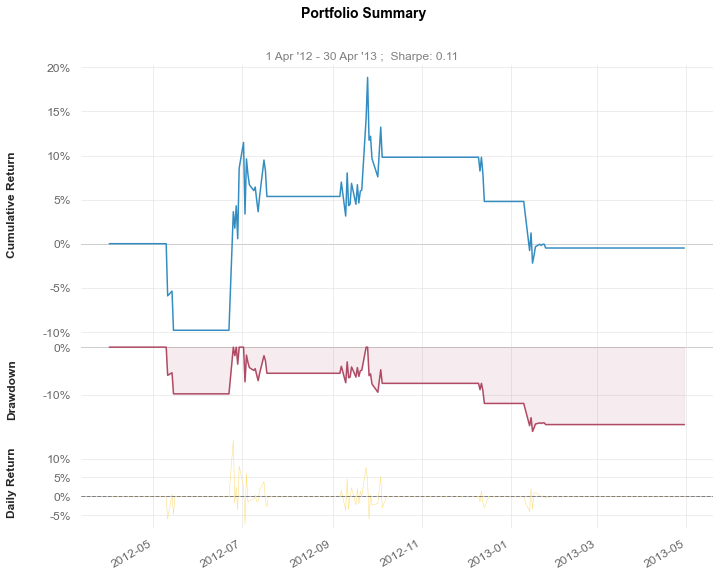

In [190]:
qs.plots.snapshot(df_stock)